# 08 View inline posgres data

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
#import matplotlib.animation as animation
import datetime
import psycopg2


In [3]:
import medareda_lib

def get_conn():
    return medareda_lib.get_conn()


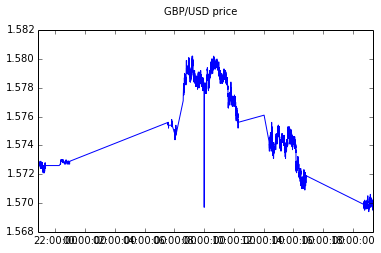

In [4]:
# Import matplotlib (plotting) and numpy (numerical arrays).
# This enables their use in the Notebook.
#%matplotlib inline
#import matplotlib.pyplot as plt
#import numpy as np

# Import IPython's interact function which is used below to
# build the interactive widgets
from IPython.html.widgets import interact

def plot_sine(refresh=True): #, frequency=4.0, grid_points=12):
    
    fig1 = plt.figure()
    fig1.suptitle('GBP/USD price')
    fig1.autofmt_xdate()

    ax1 = fig1.add_subplot(1,1,1)

    connpg = get_conn()
    curpg = connpg.cursor()
    curpg.execute('SELECT date as "[timestamp]", price FROM vPrice;')
    results =  curpg.fetchall()
    #print results[0]
    
    connpg.commit()
    curpg.close()
    connpg.close()
    
    data = []
    x = []
    y = []

    for row in results:
        
        x.append(row[0])
        y.append(row[1])

    ax1.clear()
    ax1.plot(x,y)
    ax1.legend(loc='upper left')
    
    

interact(plot_sine, refresh=True)#, frequency=(1.0, 22.0, 0.5), grid_points=(10, 16, 1), );


